# Importing and Visualising the dataset
## Extracting the dataset

In [0]:
from zipfile import ZipFile
file_name = "automobile-dataset.zip"
with ZipFile(file_name,'r') as zip:
    zip.extractall()
    print('Done')

Done


## Importing Libraries

In [0]:

import numpy as np 

# data processing

import pandas as pd 
import numpy as np

# data visualization

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import plotly.graph_objs as go
import plotly.offline as py
from sklearn.pipeline import Pipeline


from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
#LabelEncoder

from sklearn import preprocessing as PP

**Reading the Csv file and converting it into a dataset**

In [0]:
df=pd.read_csv("Automobile_data.csv")

**Printing the number of unique features i.e the column values**

In [0]:
col=df.columns
print(col)

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


In [0]:
df.tail(40)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
165,1,168,toyota,gas,std,two,sedan,rwd,front,94.5,168.7,64.0,52.6,2265,dohc,four,98,mpfi,3.24,3.08,9.4,112,6600,26,29,9298
166,1,168,toyota,gas,std,two,hatchback,rwd,front,94.5,168.7,64.0,52.6,2300,dohc,four,98,mpfi,3.24,3.08,9.4,112,6600,26,29,9538
167,2,134,toyota,gas,std,two,hardtop,rwd,front,98.4,176.2,65.6,52.0,2540,ohc,four,146,mpfi,3.62,3.5,9.3,116,4800,24,30,8449
168,2,134,toyota,gas,std,two,hardtop,rwd,front,98.4,176.2,65.6,52.0,2536,ohc,four,146,mpfi,3.62,3.5,9.3,116,4800,24,30,9639
169,2,134,toyota,gas,std,two,hatchback,rwd,front,98.4,176.2,65.6,52.0,2551,ohc,four,146,mpfi,3.62,3.5,9.3,116,4800,24,30,9989
170,2,134,toyota,gas,std,two,hardtop,rwd,front,98.4,176.2,65.6,52.0,2679,ohc,four,146,mpfi,3.62,3.5,9.3,116,4800,24,30,11199
171,2,134,toyota,gas,std,two,hatchback,rwd,front,98.4,176.2,65.6,52.0,2714,ohc,four,146,mpfi,3.62,3.5,9.3,116,4800,24,30,11549
172,2,134,toyota,gas,std,two,convertible,rwd,front,98.4,176.2,65.6,53.0,2975,ohc,four,146,mpfi,3.62,3.5,9.3,116,4800,24,30,17669
173,-1,65,toyota,gas,std,four,sedan,fwd,front,102.4,175.6,66.5,54.9,2326,ohc,four,122,mpfi,3.31,3.54,8.7,92,4200,29,34,8948
174,-1,65,toyota,diesel,turbo,four,sedan,fwd,front,102.4,175.6,66.5,54.9,2480,ohc,four,110,idi,3.27,3.35,22.5,73,4500,30,33,10698


**Visualizing the dataset** 

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [0]:
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


**Cleaning the Dataset**

In [0]:
for i in col:
    print(df[i].unique())

[ 3  1  2  0 -1 -2]
['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
['gas' 'diesel']
['std' 'turbo']
['two' 'four' '?']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
[ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2
 107.9 114.2 108.   89.5  98.4  96.1  99.1  93.3  97.   96.9  95.7 102.4
 102.9 104.5  97.3 104.3 

In [0]:
df.shape

(205, 26)

In [0]:
df['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [0]:
df1=df.copy()

**Replacing all the question mark (?) with 0**

In [0]:
df['normalized-losses'] = df['normalized-losses'].replace(

    to_replace="?", value=0)
df['horsepower'] = df['horsepower'].replace(

    to_replace="?", value=0)

df['peak-rpm'] = df['peak-rpm'].replace(

    to_replace="?", value=0)

df['bore'] = df['bore'].replace(

    to_replace="?", value=0)

df['stroke'] = df['stroke'].replace(

    to_replace="?", value=0)

df['price'] = df['price'].replace(

    to_replace="?", value=0)

In [0]:
for i in col:
    print(df[i].unique())

[ 3  1  2  0 -1 -2]
[0 '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
['gas' 'diesel']
['std' 'turbo']
['two' 'four' '?']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
[ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2
 107.9 114.2 108.   89.5  98.4  96.1  99.1  93.3  97.   96.9  95.7 102.4
 102.9 104.5  97.3 104.3 10

In [0]:
df.sample(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
18,2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151
108,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3197,l,four,152,idi,3.7,3.52,21.0,95,4150,28,33,13200
120,1,154,plymouth,gas,std,four,hatchback,fwd,front,93.7,157.3,63.8,50.6,1967,ohc,four,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6229
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
40,0,85,honda,gas,std,four,sedan,fwd,front,96.5,175.4,62.5,54.1,2372,ohc,four,110,1bbl,3.15,3.58,9.0,86,5800,27,33,10295


**Calculating the median values of the columns we replaced with 0**

In [0]:
median1 = df['normalized-losses'].median()
median2 = df['horsepower'].median()
median3 = df['peak-rpm'].median()
#median4 = df['num-of-doors'].median()
median5 = df['bore'].median()
median6 = df['stroke'].median()
median7 = df['price'].median()

**Replacing the 0 values with median values**

In [0]:

df['normalized-losses'] = df['normalized-losses'].replace(to_replace=0, value=median1)
df['horsepower'] = df['horsepower'].replace(to_replace=0, value=median2)
df['peak-rpm'] = df['peak-rpm'].replace(to_replace=0, value=median3)

df['bore'] = df['horsepower'].replace(to_replace=0, value=median5)
df['stroke'] = df['peak-rpm'].replace(to_replace=0, value=median6)
df['price'] = df['price'].replace(to_replace=0, value=median7)



In [0]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,103,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,111,5000,9.0,111,5000,21,27,13495
1,3,103,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,111,5000,9.0,111,5000,21,27,16500
2,1,103,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,154,5000,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,102,5500,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,115,5500,8.0,115,5500,18,22,17450


**Label Encoding**

In [0]:
df['Make'] = PP.LabelEncoder().fit_transform(df['make']) # Creating a new column 'Embarked_code' with all the data from the column Embarked
df['Fuel_type']=PP.LabelEncoder().fit_transform(df['fuel-type'])
df['Drive-wheels']=PP.LabelEncoder().fit_transform(df['drive-wheels'])
df['Engine_location']=PP.LabelEncoder().fit_transform(df['engine-location'])
df['Aspiration']=PP.LabelEncoder().fit_transform(df['aspiration'])
df['Body_style']=PP.LabelEncoder().fit_transform(df['body-style'])
df['Fuel_system']=PP.LabelEncoder().fit_transform(df['fuel-system'])
df['Engine_type']=PP.LabelEncoder().fit_transform(df['engine-type'])
df['Number_of_cylinders']=PP.LabelEncoder().fit_transform(df['num-of-cylinders'])

In [0]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,Make,Fuel_type,Drive-wheels,Engine_location,Aspiration,Body_style,Fuel_system,Engine_type,Number_of_cylinders
0,3,103,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,111,5000,9.0,111,5000,21,27,13495,0,1,2,0,0,0,5,0,2
1,3,103,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,111,5000,9.0,111,5000,21,27,16500,0,1,2,0,0,0,5,0,2
2,1,103,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,154,5000,9.0,154,5000,19,26,16500,0,1,2,0,0,2,5,5,3
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,102,5500,10.0,102,5500,24,30,13950,1,1,1,0,0,3,5,3,2
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,115,5500,8.0,115,5500,18,22,17450,1,1,0,0,0,3,5,3,1


In [0]:
df.drop(['make'],axis=1,inplace=True)
df.drop(['fuel-type'],axis=1,inplace=True)
df.drop(['drive-wheels'],axis=1,inplace=True)
df.drop(['engine-location'],axis=1,inplace=True)
df.drop(['aspiration'],axis=1,inplace=True)
df.drop(['body-style'],axis=1,inplace=True)
df.drop(['fuel-system'],axis=1,inplace=True)
df.drop(['engine-type'],axis=1,inplace=True)
df.drop(['num-of-cylinders'],axis=1,inplace=True)



In [0]:

df['Number_of_doors'] = PP.LabelEncoder().fit_transform(df['num-of-doors'])

In [0]:
df.drop(['num-of-doors'],axis=1,inplace=True)

In [0]:
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,Make,Fuel_type,Drive-wheels,Engine_location,Aspiration,Body_style,Fuel_system,Engine_type,Number_of_cylinders,Number_of_doors
0,3,103,88.6,168.8,64.1,48.8,2548,130,111,5000,9.0,111,5000,21,27,13495,0,1,2,0,0,0,5,0,2,2
1,3,103,88.6,168.8,64.1,48.8,2548,130,111,5000,9.0,111,5000,21,27,16500,0,1,2,0,0,0,5,0,2,2
2,1,103,94.5,171.2,65.5,52.4,2823,152,154,5000,9.0,154,5000,19,26,16500,0,1,2,0,0,2,5,5,3,2
3,2,164,99.8,176.6,66.2,54.3,2337,109,102,5500,10.0,102,5500,24,30,13950,1,1,1,0,0,3,5,3,2,1
4,2,164,99.4,176.6,66.4,54.3,2824,136,115,5500,8.0,115,5500,18,22,17450,1,1,0,0,0,3,5,3,1,1


**Dividing into test train**

In [0]:
x=df.copy()
x.drop('price',axis=1,inplace=True)
y=df['price']

**Finding the Random State**

In [0]:
from sklearn.model_selection import train_test_split
ts_score=[]
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr = RandomForestRegressor().fit(x_train, y_train)
    ts_score.append(lr.score(x_test,y_test))
k=ts_score.index(np.max(ts_score))
print(k)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will chan

5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will chan

In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2,random_state=k)
train.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,Make,Fuel_type,Drive-wheels,Engine_location,Aspiration,Body_style,Fuel_system,Engine_type,Number_of_cylinders,Number_of_doors
46,2,103,96.0,172.6,65.2,51.4,2734,119,90,5000,9.2,90,5000,24,29,11048,6,1,2,0,0,2,7,3,2,2
183,2,122,97.3,171.7,65.5,55.7,2209,109,85,5250,9.0,85,5250,27,34,7975,20,1,1,0,0,3,5,3,2,2
98,2,168,95.1,162.4,63.8,53.3,2008,97,69,5200,9.4,69,5200,31,37,8249,12,1,1,0,0,1,1,3,2,2
197,-1,74,104.3,188.8,67.2,57.5,3042,141,114,5400,9.5,114,5400,24,28,16515,21,1,2,0,0,4,5,3,2,1
101,0,128,100.4,181.7,66.5,55.1,3095,181,152,5200,9.0,152,5200,17,22,13499,12,1,1,0,0,3,5,5,3,1


In [0]:
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,Make,Fuel_type,Drive-wheels,Engine_location,Aspiration,Body_style,Fuel_system,Engine_type,Number_of_cylinders,Number_of_doors
0,3,103,88.6,168.8,64.1,48.8,2548,130,111,5000,9.0,111,5000,21,27,13495,0,1,2,0,0,0,5,0,2,2
1,3,103,88.6,168.8,64.1,48.8,2548,130,111,5000,9.0,111,5000,21,27,16500,0,1,2,0,0,0,5,0,2,2
2,1,103,94.5,171.2,65.5,52.4,2823,152,154,5000,9.0,154,5000,19,26,16500,0,1,2,0,0,2,5,5,3,2
3,2,164,99.8,176.6,66.2,54.3,2337,109,102,5500,10.0,102,5500,24,30,13950,1,1,1,0,0,3,5,3,2,1
4,2,164,99.4,176.6,66.4,54.3,2824,136,115,5500,8.0,115,5500,18,22,17450,1,1,0,0,0,3,5,3,1,1


##Checking accuracy on the raw data with different models

**RandomForestRegressor**

In [0]:
from sklearn.ensemble import RandomForestRegressor
clc=RandomForestRegressor()
clc.fit(x_train, y_train)
accuracy=clc.score(x_train,y_train)*100
print('Accuracy:', round(accuracy, 2), '%.')

accuracy=clc.score(x_test,y_test)*100
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 97.14 %.
Accuracy: 83.1 %.


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



**DecisionTreeRegressor**

In [0]:
from sklearn.tree import DecisionTreeRegressor
clc=DecisionTreeRegressor()
clc.fit(x_train, y_train)
accuracy=clc.score(x_train,y_train)*100
print('Accuracy:', round(accuracy, 2), '%.')

accuracy=clc.score(x_test,y_test)*100
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.91 %.
Accuracy: 77.43 %.


**LinearRegression**

In [0]:
from sklearn.linear_model import LinearRegression
clc=LinearRegression()
clc.fit(x_train, y_train)
accuracy=clc.score(x_train,y_train)*100
print('Accuracy:', round(accuracy, 2), '%.')

accuracy=clc.score(x_test,y_test)*100
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 87.87 %.
Accuracy: 76.87 %.


In [0]:
df['Price']=df['price']
df=df.drop(['price'],axis=1)


In [0]:
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,Make,Fuel_type,Drive-wheels,Engine_location,Aspiration,Body_style,Fuel_system,Engine_type,Number_of_cylinders,Number_of_doors,Price
0,3,103,88.6,168.8,64.1,48.8,2548,130,111,5000,9.0,111,5000,21,27,0,1,2,0,0,0,5,0,2,2,13495
1,3,103,88.6,168.8,64.1,48.8,2548,130,111,5000,9.0,111,5000,21,27,0,1,2,0,0,0,5,0,2,2,16500
2,1,103,94.5,171.2,65.5,52.4,2823,152,154,5000,9.0,154,5000,19,26,0,1,2,0,0,2,5,5,3,2,16500
3,2,164,99.8,176.6,66.2,54.3,2337,109,102,5500,10.0,102,5500,24,30,1,1,1,0,0,3,5,3,2,1,13950
4,2,164,99.4,176.6,66.4,54.3,2824,136,115,5500,8.0,115,5500,18,22,1,1,0,0,0,3,5,3,1,1,17450


##Plotting Heatmap to visualise the corelation among different features

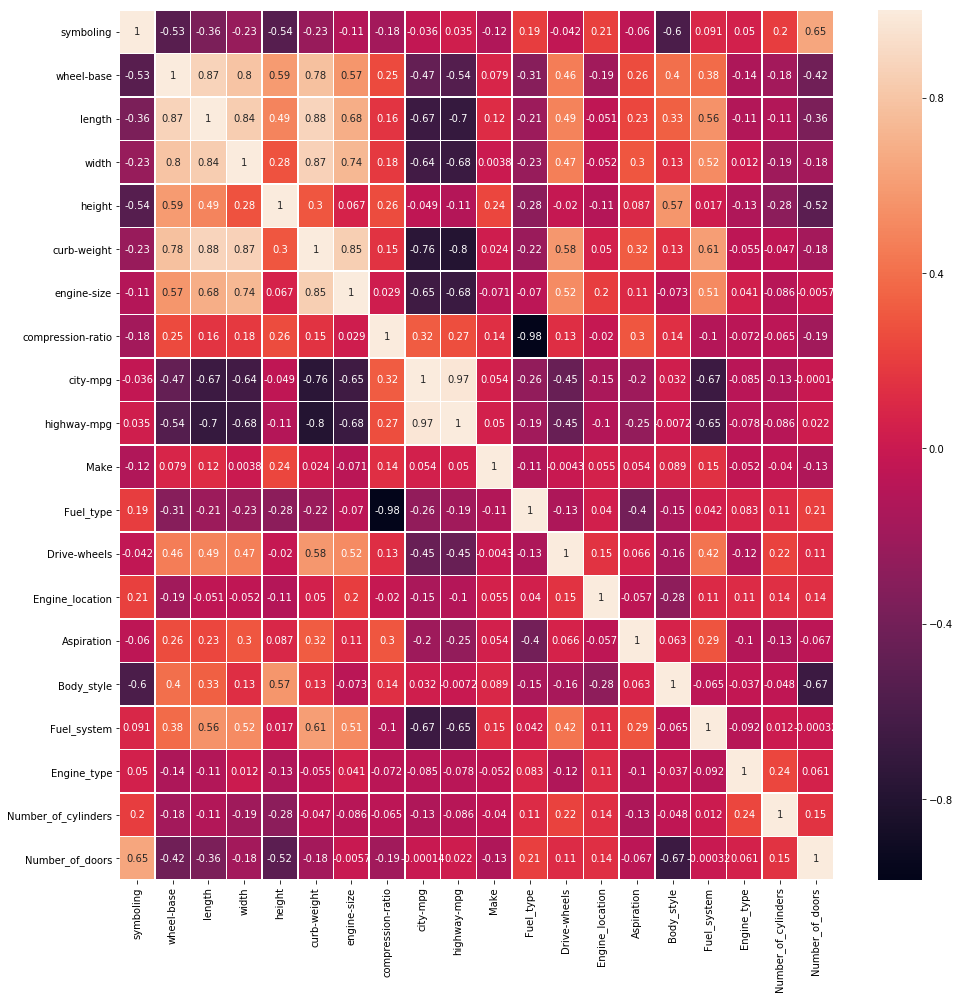

In [0]:
f,ax = plt.subplots(figsize=(16,16))
sns.heatmap(df.corr(), annot = True,linewidths=0.5,)

##Finding and Plotting feature importance

In [0]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(x_train, y_train)
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
engine-size,0.560
curb-weight,0.171
highway-mpg,0.116
width,0.021
horsepower,0.021
city-mpg,0.021
bore,0.015
compression-ratio,0.011
length,0.009


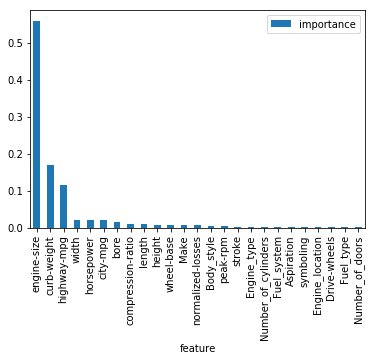

In [0]:
importances.plot.bar()

## Creating new features

In [0]:
df['new1']=df['engine-size']+df['Fuel_system']+df['Drive-wheels']+df['curb-weight']+df['width']+df['length']+df['wheel-base']
df['new2']=1/(df['Drive-wheels']+df['Fuel_system']+df['engine-size']+df['curb-weight']+df['width']+df['wheel-base'])
df['new3']=(df['Fuel_system']+df['Drive-wheels']+df['engine-size']+df['width']+df['length']+df['wheel-base'])/(df['highway-mpg']+df['city-mpg'])


In [0]:
df.sample(5)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,Make,Fuel_type,Drive-wheels,Engine_location,Aspiration,Body_style,Fuel_system,Engine_type,Number_of_cylinders,Number_of_doors,Price,new1,new2,new3
201,-1,95,109.1,188.8,68.8,55.5,3049,141,160,5300,8.7,160,5300,19,25,21,1,2,0,1,3,5,3,2,1,19045,3563.7,0.000296,11.697727
69,0,93,106.7,187.5,70.3,54.9,3495,183,123,4350,21.5,123,4350,22,25,9,0,2,0,1,1,3,3,1,2,28176,4047.5,0.000259,11.755319
166,1,168,94.5,168.7,64.0,52.6,2300,98,112,6600,9.4,112,6600,26,29,19,1,2,0,0,2,5,0,2,2,9538,2732.2,0.000390,7.858182
111,0,161,107.9,186.7,68.4,56.7,3075,120,95,5000,8.4,95,5000,19,24,13,1,2,0,0,3,5,2,2,1,15580,3565.0,0.000296,11.395349
1,3,103,88.6,168.8,64.1,48.8,2548,130,111,5000,9.0,111,5000,21,27,0,1,2,0,0,0,5,0,2,2,16500,3006.5,0.000352,9.552083


In [0]:
df['Price_cars']=df['Price']

In [0]:
df=df.drop(['Price'],axis=1)

In [0]:
df.sample()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,Make,Fuel_type,Drive-wheels,Engine_location,Aspiration,Body_style,Fuel_system,Engine_type,Number_of_cylinders,Number_of_doors,new1,new2,new3,Price_cars
23,1,118,93.7,157.3,63.8,50.8,2128,98,102,5500,7.6,102,5500,24,30,4,1,1,0,1,2,5,3,2,2,2546.8,0.000418,7.755556,7957


In [0]:
df2=df.copy()

**Again splitting into test and train**

In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df2, test_size=0.2,random_state=k)
train.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,Make,Fuel_type,Drive-wheels,Engine_location,Aspiration,Body_style,Fuel_system,Engine_type,Number_of_cylinders,Number_of_doors,new1,new2,new3,Price_cars
46,2,103,96.0,172.6,65.2,51.4,2734,119,90,5000,9.2,90,5000,24,29,6,1,2,0,0,2,7,3,2,2,3195.8,0.000331,8.713208,11048
183,2,122,97.3,171.7,65.5,55.7,2209,109,85,5250,9.0,85,5250,27,34,20,1,1,0,0,3,5,3,2,2,2658.5,0.000402,7.368852,7975
98,2,168,95.1,162.4,63.8,53.3,2008,97,69,5200,9.4,69,5200,31,37,12,1,1,0,0,1,1,3,2,2,2428.3,0.000441,6.180882,8249
197,-1,74,104.3,188.8,67.2,57.5,3042,141,114,5400,9.5,114,5400,24,28,21,1,2,0,0,4,5,3,2,1,3550.3,0.000297,9.775000,16515
101,0,128,100.4,181.7,66.5,55.1,3095,181,152,5200,9.0,152,5200,17,22,12,1,1,0,0,3,5,5,3,1,3630.6,0.000290,13.733333,13499


##Plotting a Heatmap after feature engineering

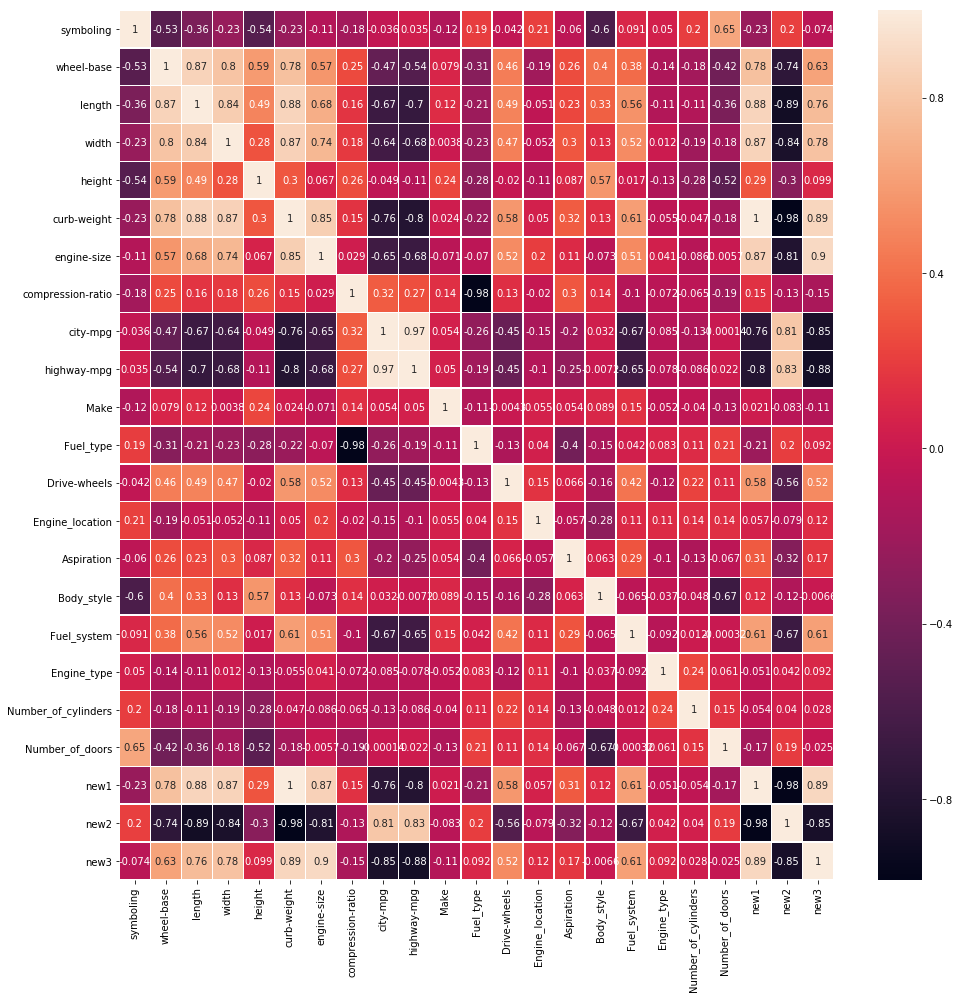

In [0]:
f,ax = plt.subplots(figsize=(16,16))
sns.heatmap(df2.corr(), annot = True,linewidths=0.5,)

###Dividing into test and train

In [0]:
x_train=train.copy()
x_train.drop(['Price_cars'],axis=1)
y_train=train['Price_cars']

In [0]:
x_test=test.copy()
x_test.drop(['Price_cars'],axis=1)
y_test=test['Price_cars']

##Now checking the new improved dataset with different algorithms to compute the accuracy

**RandomForestRegressor**

In [0]:
from sklearn.ensemble import RandomForestRegressor
clc=RandomForestRegressor()
clc.fit(x_train, y_train)
accuracy=clc.score(x_train,y_train)*100
print('Accuracy:', round(accuracy, 2), '%.')

accuracy=clc.score(x_test,y_test)*100
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.63 %.
Accuracy: 99.54 %.


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



**DecisionTreeRegressor**

In [0]:
from sklearn.tree import DecisionTreeRegressor
clc=DecisionTreeRegressor()
clc.fit(x_train, y_train)
accuracy=clc.score(x_train,y_train)*100
print('Accuracy:', round(accuracy, 2), '%.')

accuracy=clc.score(x_test,y_test)*100
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 100.0 %.
Accuracy: 97.9 %.


**LinearRegression**

In [0]:
from sklearn.linear_model import LinearRegression
clc=LinearRegression()
clc.fit(x_train, y_train)
accuracy=clc.score(x_train,y_train)*100
print('Accuracy:', round(accuracy, 2), '%.')

accuracy=clc.score(x_test,y_test)*100
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 100.0 %.
Accuracy: 100.0 %.
